In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load nums resize nums with WIDTH and appropriate height
WIDTH = 300
ims = [Image.open('./pics/{}.png'.format(i)) for i in range(10)]
n_ims = [pic.resize((WIDTH, int(pic.size[1] / pic.size[0] * WIDTH))) for pic in ims]

In [3]:
# load signs and get dict
pre_signs = [Image.open('./pics/{}.png'.format(i)) for i in ['dot','plus','minus','div','mult','ravno']]
signs = [pic.resize((WIDTH, int(pic.size[1] / pic.size[0] * WIDTH))) for pic in pre_signs]
sign_dict = {x:y for x,y in zip(list('.+-/*='), signs)}

In [4]:
# items for generating of image form
widths, heights = zip(*(i.size for i in n_ims))

total_width = sum(widths)
max_height = max(heights)

In [5]:
new_im = Image.new('RGB', (total_width, max_height), (255,255,255))

x_offset = 0
for i in n_ims:
    new_im.paste(i, (x_offset, max_height-i.size[1]))
    x_offset += i.size[0]

new_im

In [6]:
# create list of single characters and list of nums with operations for calculation
def to_code(mystr):
    mystr = mystr.split('=')[0]
    result = []
    for_ex = []
    tmp_n = ''
    for c in list(mystr):
        if c == '' or c not in '1234567890.+/-*':
            continue
        if c in '1234567890.':
            tmp_n += c
        if c in '+-/*':
            for_ex.append(tmp_n)
            for_ex.append(c)
            tmp_n = ''
        result.append(c)
    for_ex.append(tmp_n)
    return result, for_ex

# create final image using sigle character code
def make_image(code, nums, signs, height=max_height, n_width=WIDTH):
    width = len(''.join(code)) * n_width
    new_im = Image.new('RGB', (width, height), (255,255,255))
    x_offset = 0

    for c in code:
        if c in '1234567890':
            im = nums[int(c)]
            new_im.paste(im, (x_offset, max_height-im.size[1]))
            x_offset += im.size[0]
        else:
            im = signs[c]
            new_im.paste(im, (x_offset, max_height-im.size[1]))
            x_offset += n_width
    return new_im

# apply operator to 2 nums
def binar_oper(n1, n2, oper):
    if oper == '*':
        return n1 * n2
    if oper == '/':
        return n1 / n2
    if oper == '+':
        return n1 + n2
    if oper == '-':
        return n1 - n2

# calculation func (with arithmetic rules)
def result_of_expr(expr):
    for S in '*/+-':
        for j in range(expr.count(S)):
            fid = expr.index(S)
            new_c = binar_oper(float(expr[fid-1]), float(expr[fid+1]), S)
            expr.pop(fid-1); expr.pop(fid-1); expr.pop(fid-1)
            expr.insert(fid-1, new_c)
    
    # rounding
    if len(expr) == 1:
        if expr[0] == int(expr[0]):
            return int(expr[0])
        return round(expr[0], 2)
    else:
        return 8888 # error code

# pipeline func
def save_and_show(inp, name='baltika_nums', w_calc=True, save=False):
    code, expr = to_code(inp)
    if w_calc == True:
        ans_expr = result_of_expr(expr) # calculation result
        code.append('=')
        code += list(str(ans_expr))
    new_pic = make_image(code, nums=n_ims, signs=sign_dict)
    if save == True:
        new_pic.save(name + '.png', 'png')
    return new_pic

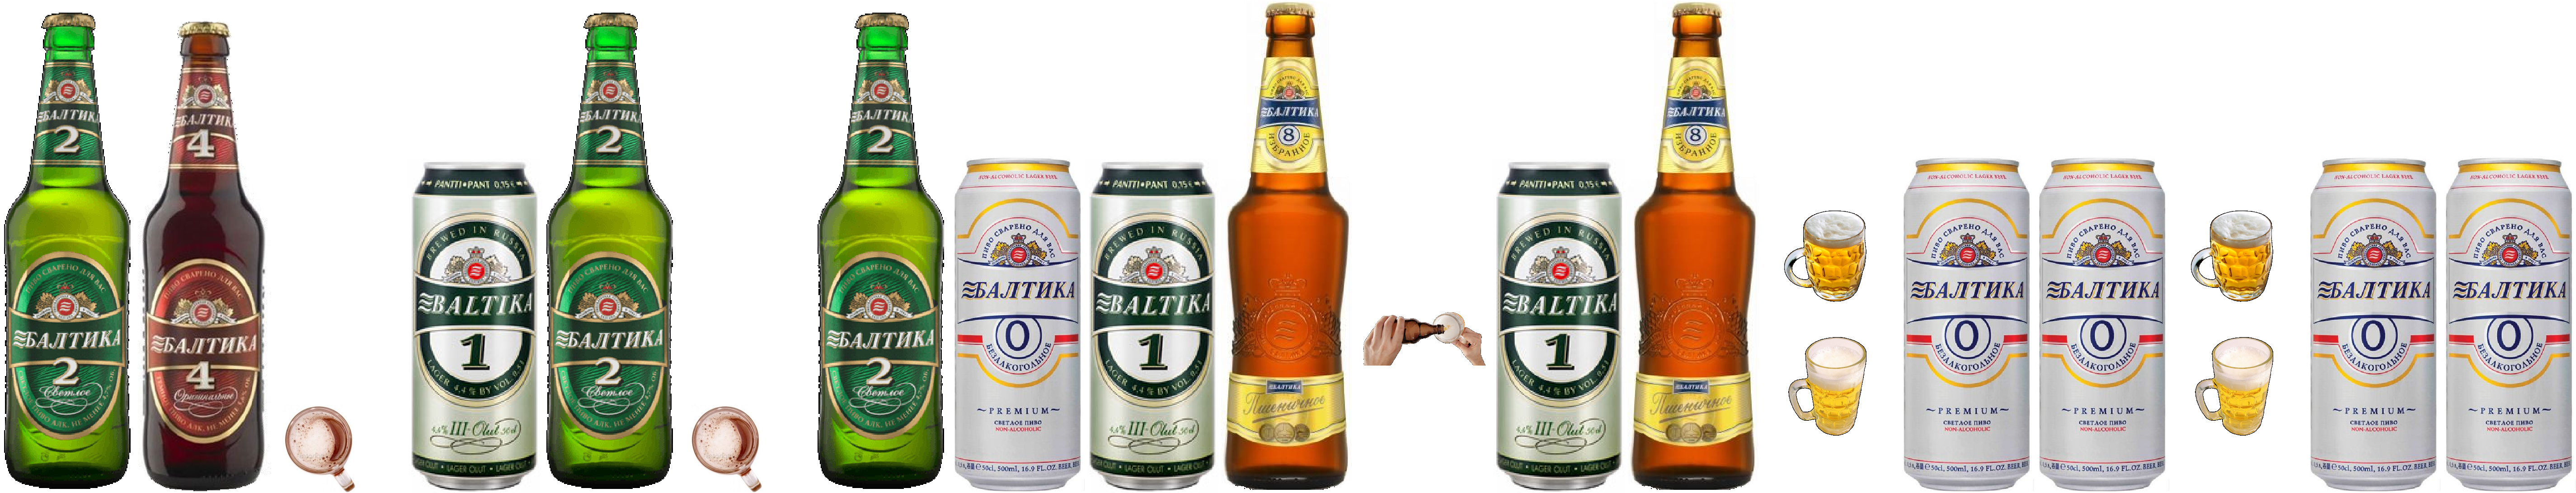

In [7]:
check0 = save_and_show('24.12.2018-18/00/00', w_calc=False)
check0

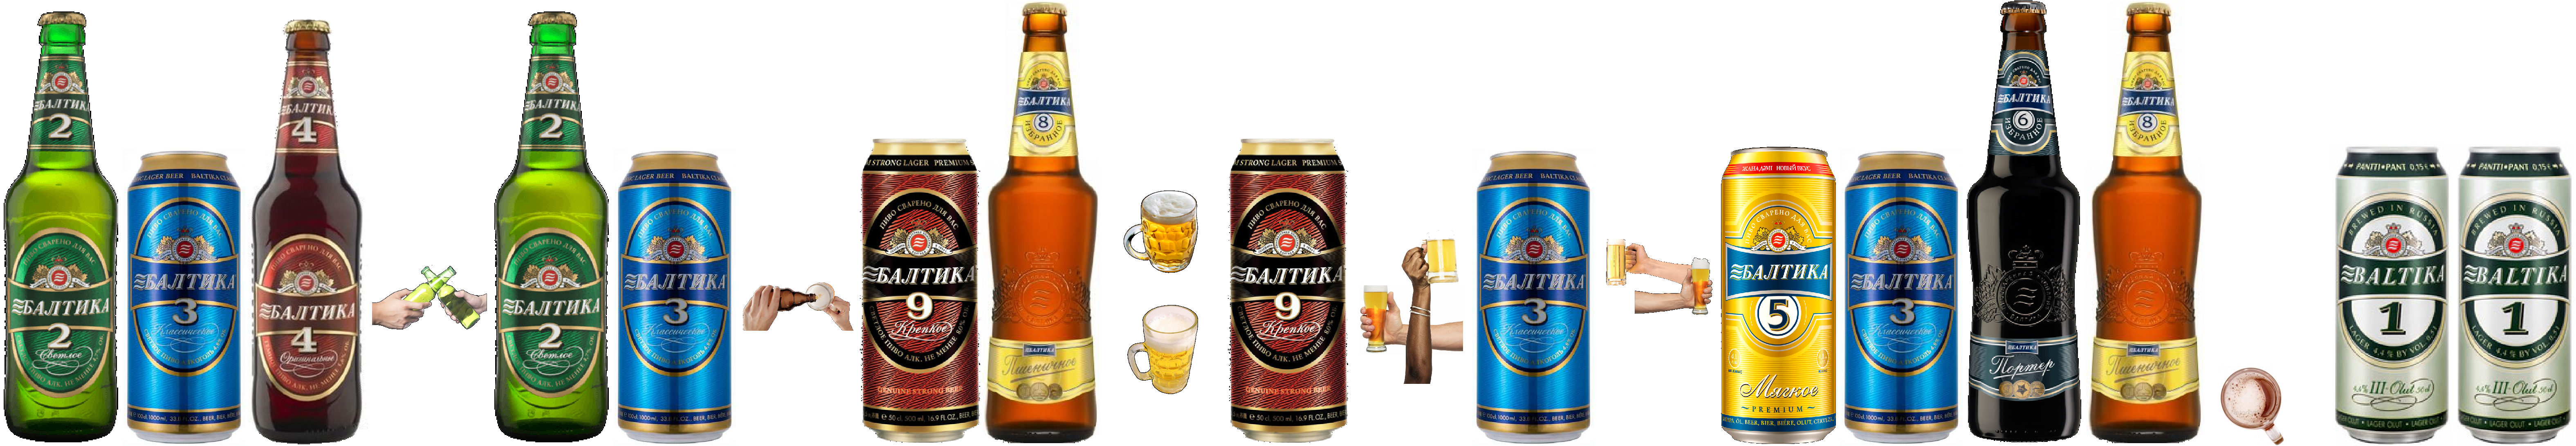

In [8]:
check1 = save_and_show('234*23-98/9+3')
check1

In [10]:
check2 = save_and_show('27*5/15+120-20', w_calc=True)
check2